In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
import os 

# Histogram

## Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

## Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

## Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

## Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

In [7]:
df_train_house_prices = pd.read_csv('/home/shashank/workspace/datascience/assignment/datavisualization/house-prices-advanced-regression-techniques/train.csv')


Skewness: 1.882876
Kurtosis: 6.536282


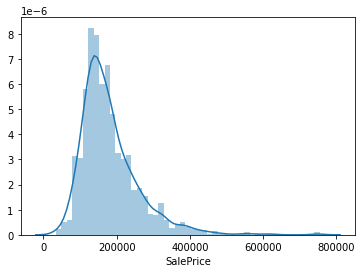

In [8]:
sns.distplot(df_train_house_prices['SalePrice']);
print("Skewness: %f" % df_train_house_prices['SalePrice'].skew())
print("Kurtosis: %f" % df_train_house_prices['SalePrice'].kurt())

# In the search for normality

## The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

## Histogram - Kurtosis and skewness.

## Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

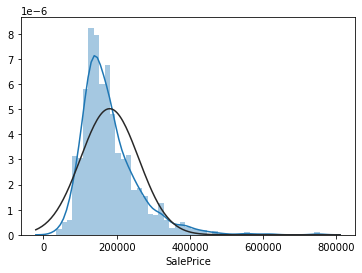

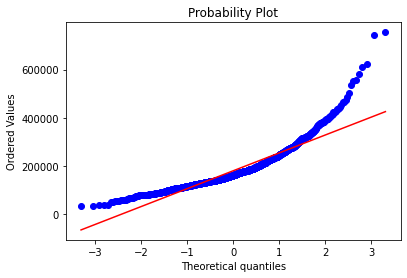

In [13]:
sns.distplot(df_train_house_prices['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train_house_prices['SalePrice'], plot=plt);

## Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

## But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well.

In [14]:
#applying log transformation
df_train_house_prices['SalePrice'] = np.log(df_train_house_prices['SalePrice'])

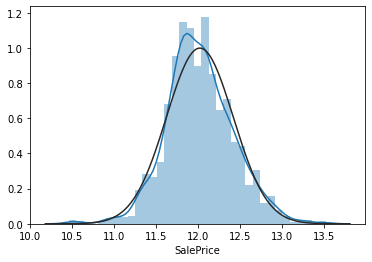

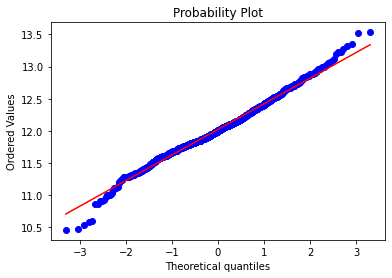

In [16]:
#transformed histogram and normal probability plot
sns.distplot(df_train_house_prices['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df_train_house_prices['SalePrice'], plot=plt)

# Do This All Remaining Column Which Are Not Normal

## A significant number of observations with value zero (houses without basement). A big problem because the value zero doesn't allow us to do log transformations.

## To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

## I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [19]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train_house_prices['HasBsmt'] = pd.Series(len(df_train_house_prices['TotalBsmtSF']), index=df_train_house_prices.index)
df_train_house_prices['HasBsmt'] = 0 
df_train_house_prices.loc[df_train_house_prices['TotalBsmtSF']>0,'HasBsmt'] = 1

In [20]:
#transform data
df_train_house_prices.loc[df_train_house_prices['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train_house_prices['TotalBsmtSF'])

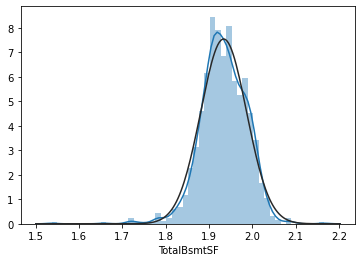

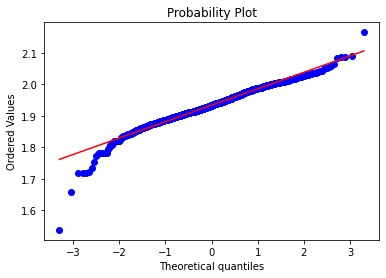

In [23]:
#histogram and normal probability plot
sns.distplot(df_train_house_prices[df_train_house_prices['TotalBsmtSF']>0]['TotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df_train_house_prices[df_train_house_prices['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

## The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

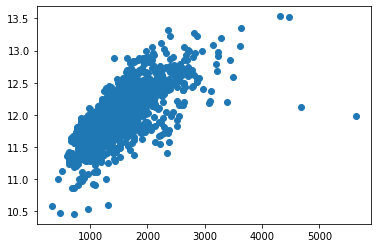

In [26]:
#scatter plot
plt.scatter(df_train_house_prices['GrLivArea'], df_train_house_prices['SalePrice']);

# scatter plot 


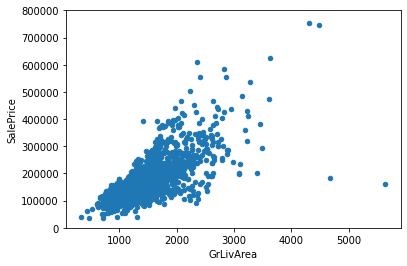

In [23]:
var = 'GrLivArea'
data = pd.concat([df_train_house_prices['SalePrice'], df_train_house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# box plot

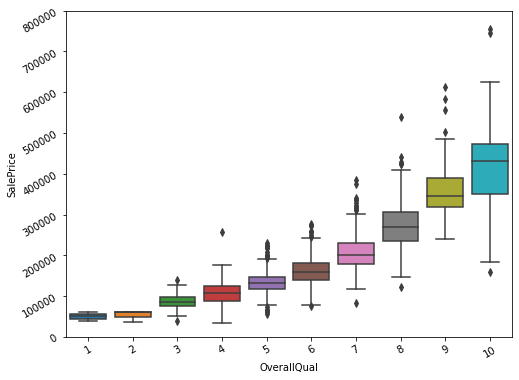

In [24]:
var = 'OverallQual'
data = pd.concat([df_train_house_prices['SalePrice'], df_train_house_prices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=30);
plt.yticks(rotation=30);

# correlation matrix

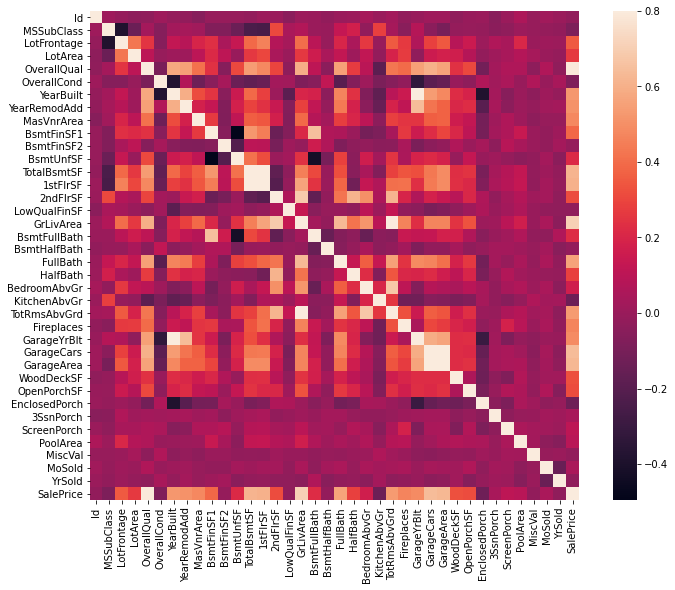

In [25]:
corrmat = df_train_house_prices.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

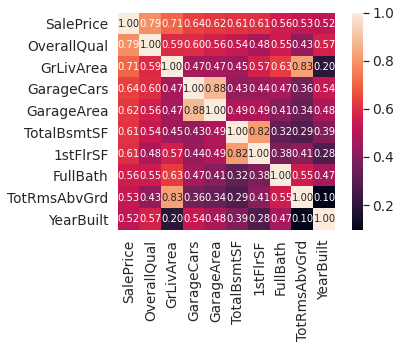

In [26]:
# Finding out those 10 variable which are highly correlated with target outcome  
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_house_prices[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train_house_prices[cols], size = 2.5)
plt.show();